# Data Mining OK Cupid

Welcome to my data science adventure

## What story do I want do tell?
* scraping
* basic analytics using pandas and some graphs
* more interesting text analytics
* some simple ML, eg a classifier? maybe try and get tea pot running

TODO:
* another scrape? see if still works, get clean data
* find graphing solution -- try plotly

## Goals for today
* Make graphs of:
 - age breakdown (histogram)
 - age breakdown for different genders
 - scatter plot of match scores against age 

        


In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas
import okc

plt.rcParams['figure.figsize'] = (12.0, 9.0)

users = okc.load_user_dicts("/home/nejl/data/okc_collections/ned_melb_new/")
df = pd.DataFrame(okc.get_stats(u) for u in users)
df.rename(columns={1:'male', 2:'female'}, inplace=True)
df.head()

,age,enemy,gender,height,height_inches,match,orientation,status,username
0,48,0,1,183.0,72.0,0,1,1,john456013
1,32,36,1,155.0,61.0,60,1,1,JWSGD
2,36,2,1,175.0,69.0,89,1,1,aaronisnow
3,28,23,1,170.0,67.0,71,1,1,The_Joker_2014
4,20,0,1,183.0,72.0,0,1,1,lennj07


Let's have a look at how this data breaks down... 

In [91]:
print("{:<20}{: >5}".format("Total:", len(df)))
print("{:<20}{: >5}".format("Women:", len(df[df['gender'] == 2])))
print("{:<20}{: >5}".format("Men:", len(df[df['gender'] == 1])))

Total:              28235
Women:               8917
Men:                19318


Wow. 

If you've heard different people talk about their experiences on OKC, you will have likely noticed that men and women have radically different stories. Women are often frustrated by the overwhelming number of messages (many of which are of low quality) and men are often frustrated by not recieving any response to their messages. The interesting thing is that it's unlikely you would ever get a sense of this assymetry from using OKC itself. Which makes sense, as OKC would never want you to know this.

How is the age of users distributed? 

<IPython.core.display.Javascript object>


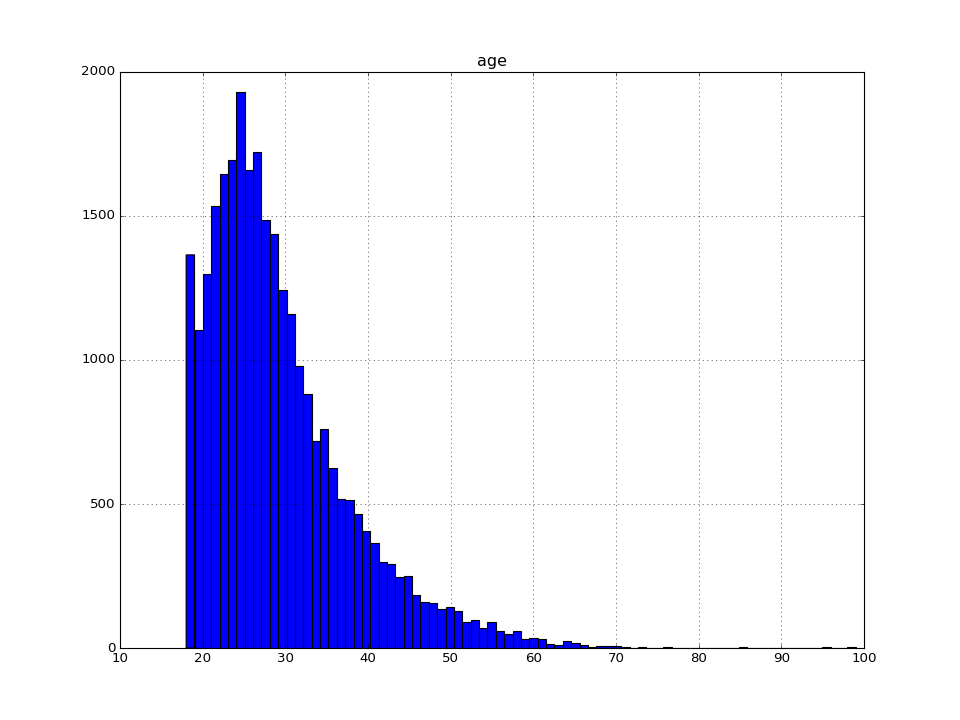

In [16]:
bins = df.hist("age", bins=80)

Perhaps unsurprisingly, there is a definite skew towards younger ages.

What about if we break this down by gender?

<IPython.core.display.Javascript object>


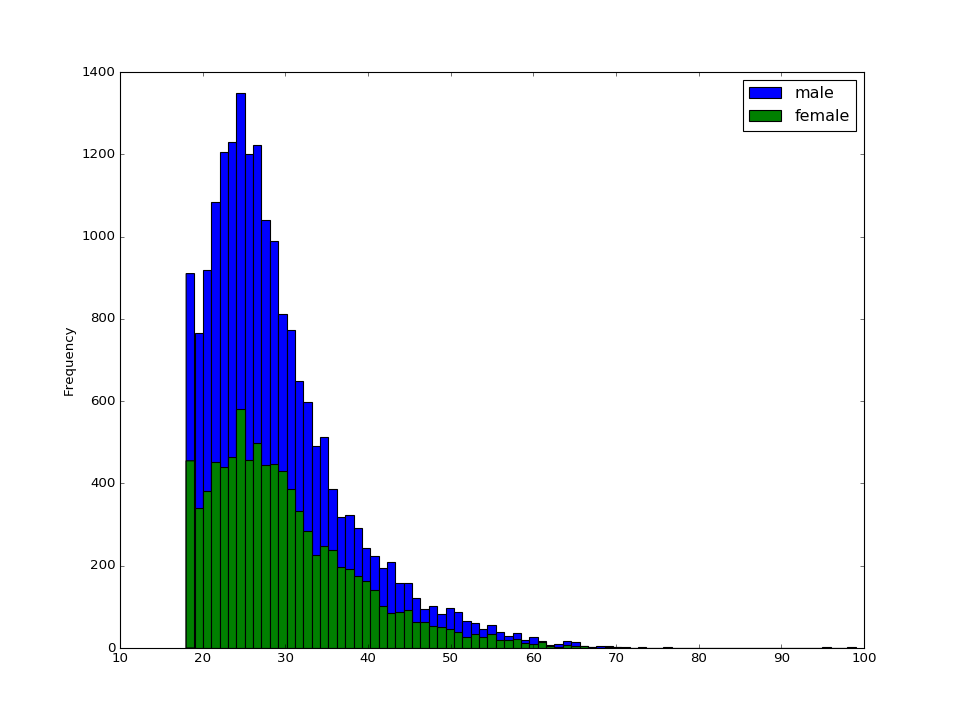

In [103]:
male_df = df[df['gender'] == 1]
female_df = df[df['gender'] == 2]

genders = pd.DataFrame({'male': male_df['age'], 'female': female_df['age']}, columns=['male', 'female'])
ax = genders.plot.hist(bins=80)


Besides from being a stark reminder how much the male presence dominates the female presence, it's also interesting to note how the ratio changes with age. In order to get a bette look, let's plot this ratio:

In [ ]:
# TODO plot ratio of 

TODO comment regarding the graph

How about the height of the Melbourne OKC population? We know that the height of a randomly sampled population is normally distributed, and it seems likely this should be the same of the dating population. However we're dealing with _reported_ height here. So let's take a look...

<IPython.core.display.Javascript object>


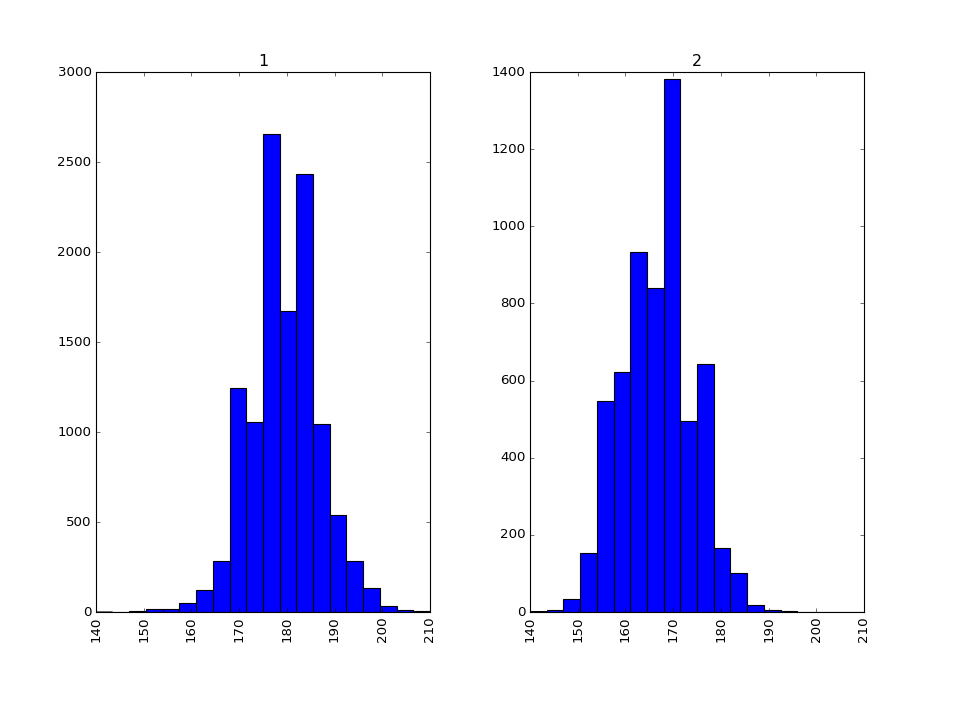

In [89]:
bins = df.hist("height", by='gender', bins=20, range=[140, 210])

The histograms of men and women's height show some pronounced distortion of the bell curve, suggesting that there are notable number of both women and men reporting themselves to be taller than they actually are. 

The ABS says that the average Australian male height is 175.6cm and the average Australian female height is 161.8cm. sooooo...

What about if we increase the granulaty of the histograms?

<IPython.core.display.Javascript object>


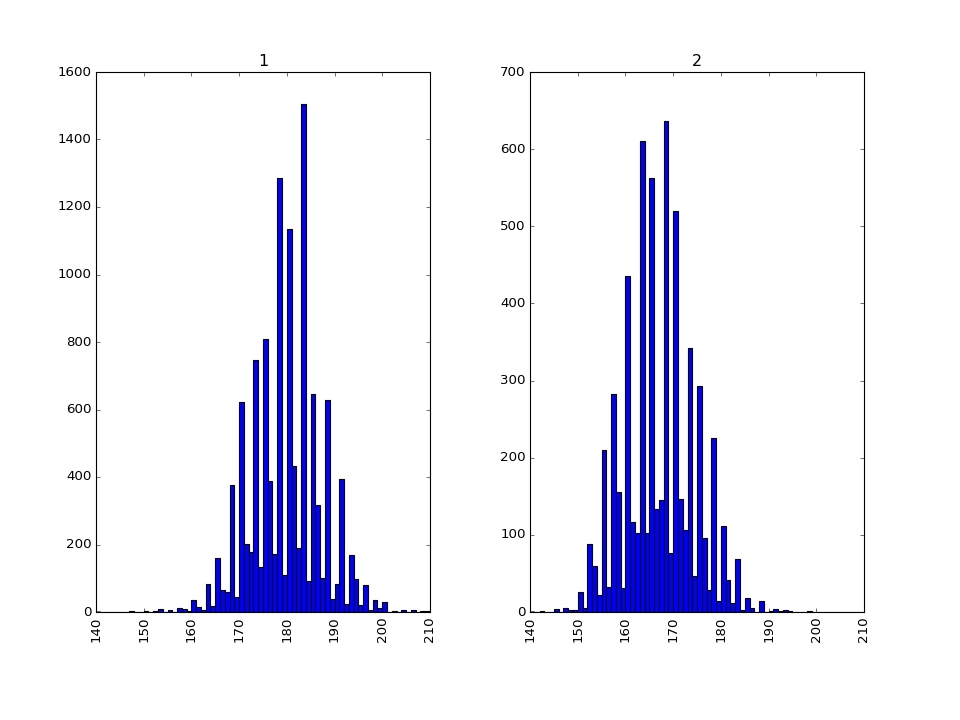

In [85]:
bins = df.hist("height", by='gender', bins=70, range=[140, 210])

Taking more fine-grained slices clearly shows that men and women both round their heght up to the nearest 5cm. Emminently reasonable, surely. In addition, men appear to also round up to 83cm, which happens to be approximately 6 foot.

<IPython.core.display.Javascript object>


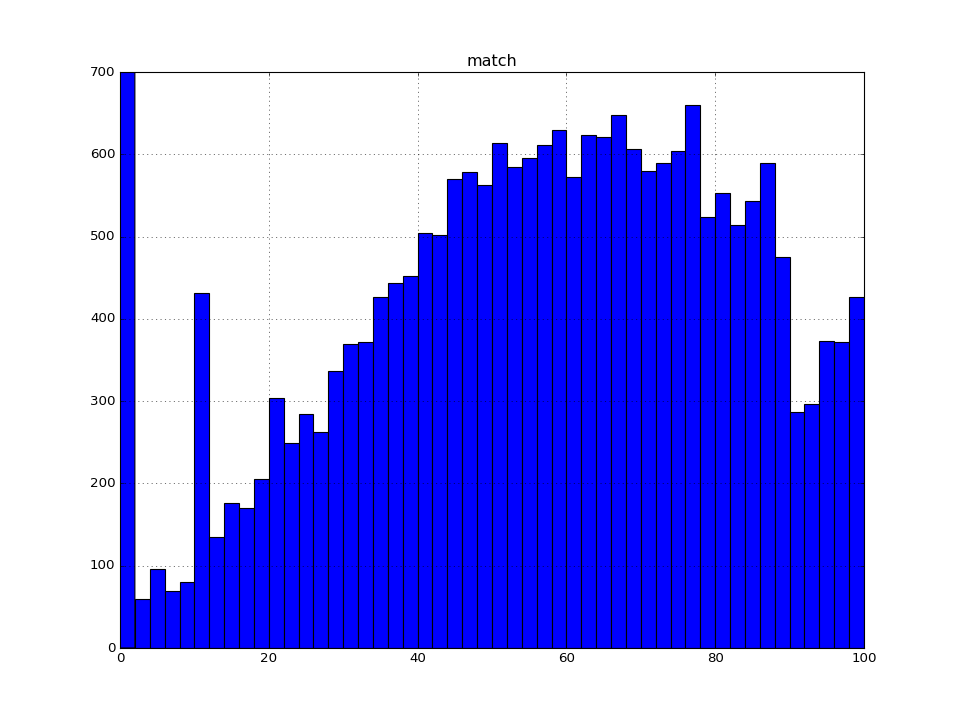

In [105]:
bins = df.hist("match", bins=50, range=[0, 100])
yax = plt.ylim(ymax=700)

<IPython.core.display.Javascript object>


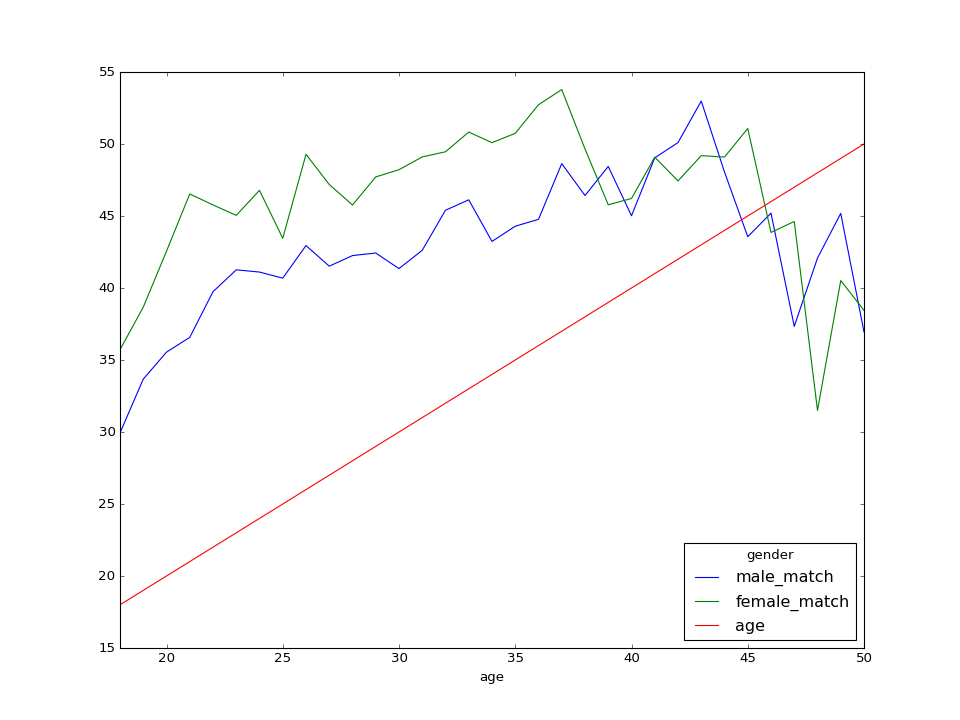

gender,male_match,female_match,age
count,66.000000,58.000000,69.000000
mean,41.403427,42.416570,52.898551
std,15.502070,14.197589,21.602114
min,0.000000,0.000000,18.000000
25%,37.541520,38.934096,35.000000
50%,41.513654,45.774160,52.000000
75%,45.350513,49.168764,69.000000
max,87.000000,74.000000,99.000000


In [126]:
# maybe put enemy scores also on this graph
# decreasing the granulaity of the graph might make it smoother/improve data spartcity issues.

# get the average match score across age/gender                                                                     
matches_df = df.groupby(['age', 'gender'])['match'].apply(np.mean).unstack('gender')
matches_df['age'] = matches_df.index
matches_df.rename(columns={1:'male_match', 2:'female_match'}, inplace=True)
matches_df[matches_df['age']<=50].plot()
matches_df.describe()

<IPython.core.display.Javascript object>


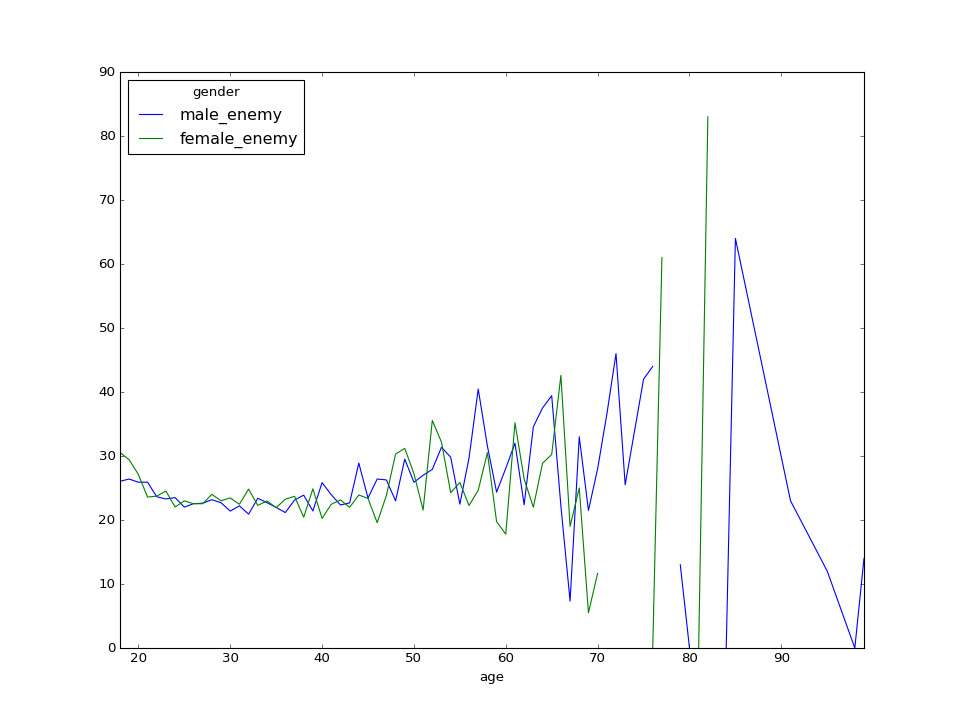

In [123]:
#  get the average match score across age/gender
enemy_df = df.groupby(['age', 'gender'])['enemy'].apply(np.mean).unstack('gender')
enemy_df.rename(columns={1:'male_enemy', 2:'female_enemy'}, inplace=True)
enemy_df.plot()

<IPython.core.display.Javascript object>


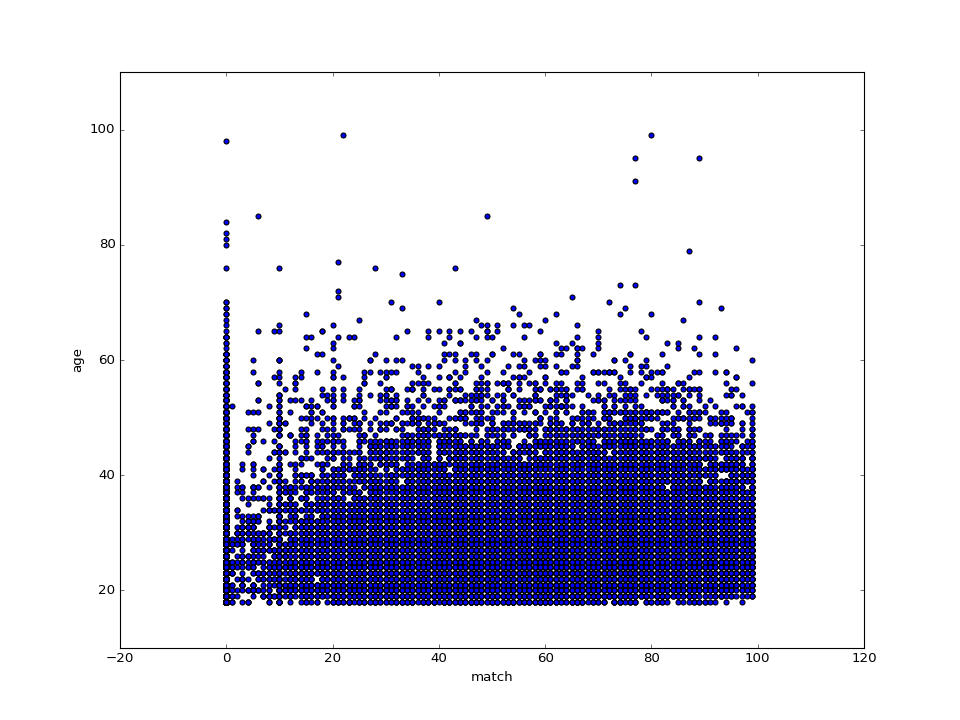

In [104]:
axes = df.plot(x='match', y='age', kind='scatter')

In [70]:
#df.groupby(['age'])['age'].apply(np.sum).unstack('age')
df1 = df.groupby(['age', 'gender'])['gender'].apply(np.sum).unstack('gender')
df1.rename(columns={1:'male', 2:'female'}, inplace=True) 


<IPython.core.display.Javascript object>


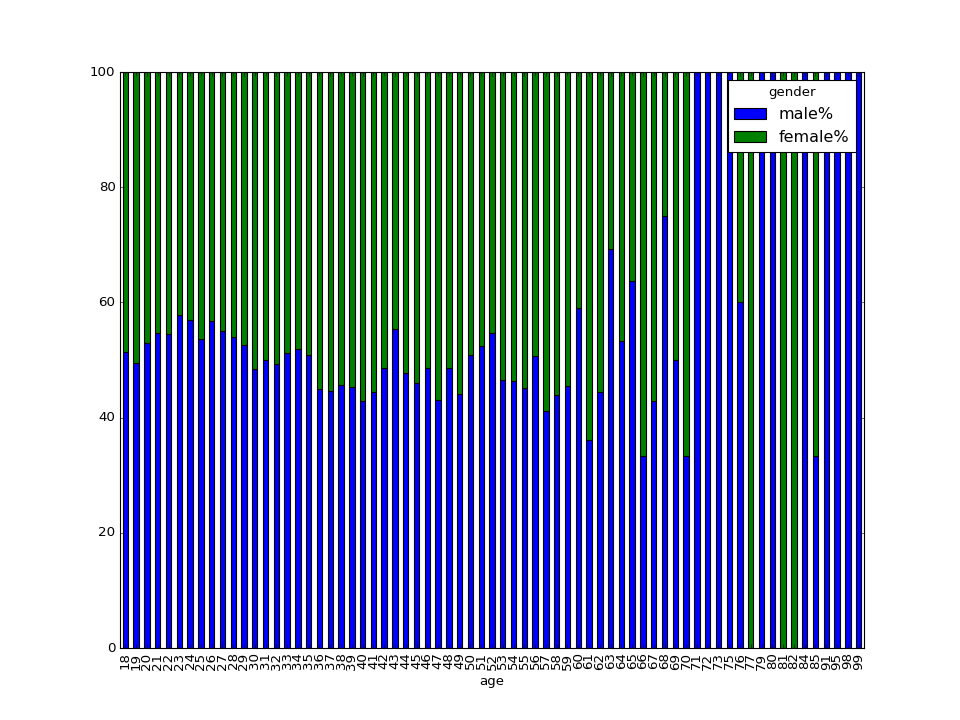

In [100]:
def munge(df):
    # get the counts of users across age/gender                                                                                                                                                                      
    df1 = df.groupby(['age', 'gender'])['gender'].apply(np.sum).unstack('gender')
    df1.rename(columns={1:'male', 2:'female'}, inplace=True)

    # add colums with relative percentages                                                                                                                                                                           
    func = lambda x:100*x.astype(float)/x.sum()
    df1[['male%', 'female%']] = df1[['male', 'female']].apply(func, axis=1)


    #return pd.concat((df1, df2, df3), axis=1)
    return df1

hist = munge(df)
hist[['male%', 'female%']].plot(kind='bar', stacked=True)

In [ ]:
#print(df[df['gender']==1].skew())
#print(df[df['gender']==2].skew())
foo = df[df['height'] > 210]
    

In [69]:
def outlier_min_max(df, column):
    "Returns the min and max values representing the boundaries of the outliers"
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    min_val = q1 - 1.5*iqr
    max_val = q3 + 1.5*iqr
    return min_val, max_val

outlier_min_max(df, 'height')


(145.5, 205.5)